In [2]:
import numpy as np
import matplotlib.pyplot as plt


class HarmonicOdeSolver:
    def __init__(self, dt, x0, xd0, omega_squared):
        "Inits the solver."
        self.dt = dt
        self.dt_squared = dt**2
        self.t = dt
        self.omega_squared = omega_squared
        self.x0 = x0
        self.xd0 = xd0
        self.x = [xd0 * dt + x0, x0]
        
    def step(self):
        "Steps the solver."
        xt, xtm1 = self.x
        xtp1 = (2 - self.omega_squared * self.dt_squared) * xt - xtm1
        self.x = (xtp1, xt)
        self.t += self.dt
        
    def step_until(self, tmax, snapshot_dt):
        "Steps the solver until a given time, returns snapshots."
        ts = [self.t]
        vals = [self.x[0]]
        niter = max(1, int(snapshot_dt // self.dt))
        while self.t < tmax:
            for _ in range(niter):
                self.step()
            vals.append(self.x[0])
            ts.append(self.t)
        return np.array(ts), np.array(vals)

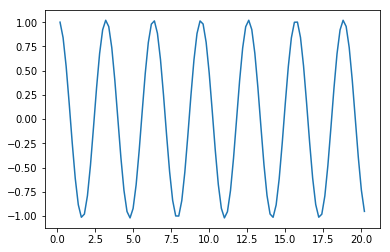

In [5]:
snapshot_dt = 0.0015

solver = HarmonicOdeSolver(2e-1, 1, 0, 4)

ts, vals = solver.step_until(20, snapshot_dt)

plt.plot(ts, vals);

#### import sympy
plt.plot(ts, vals, 'x', label='my own ode solver')
plt.plot(ts, sympy.lambdify(t, case1.rhs, 'numpy')(ts), label='sympy')
plt.legend(loc='upper right');